# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [2]:
#install.packages("kohonen")
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

[1] 210   6

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

In [4]:
#help(som)

[[1]]
           V1         V2         V3         V4          V5         V6
V1 -0.2555088 -0.2849775 -0.3711414 -0.1050287 -0.81060257 -0.7094245
V2  0.5179167  0.5657858  0.5290430  0.5139738  0.05298109  0.5601715
V3 -1.0380272 -1.0397738 -0.9494764 -1.0528096  0.80709099 -0.6845703
V4  1.4882127  1.4801241  1.4769927  1.3564489 -0.09555489  1.4953321



Warning message in par(opar):
"argument 1 does not name a graphical parameter"
Warning message in par(opar):
"argument 1 does not name a graphical parameter"


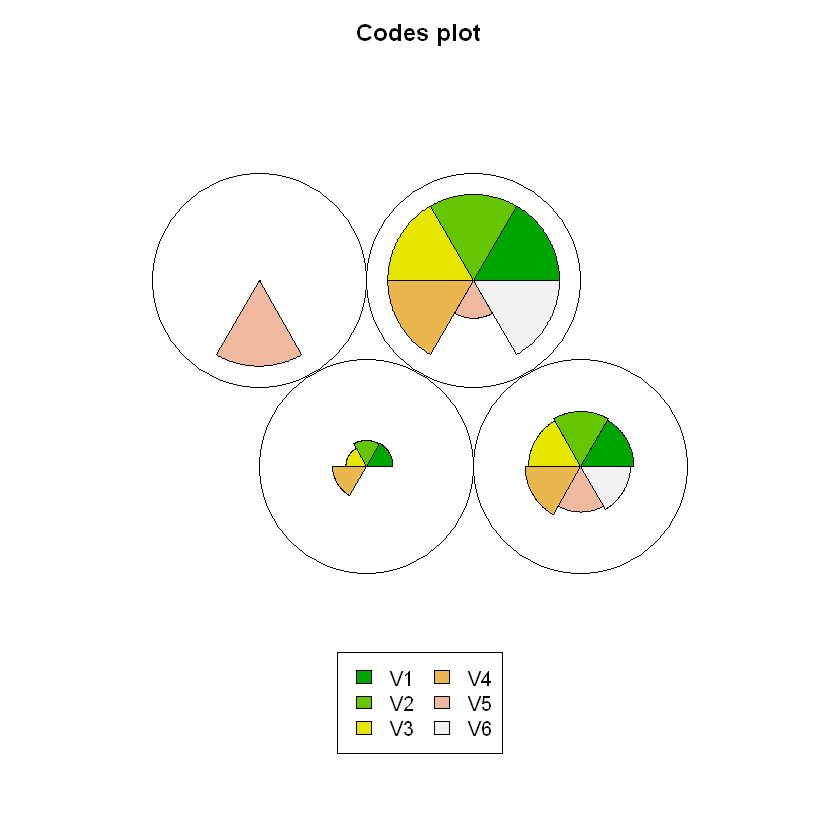

Warning message in par(opar):
"argument 1 does not name a graphical parameter"


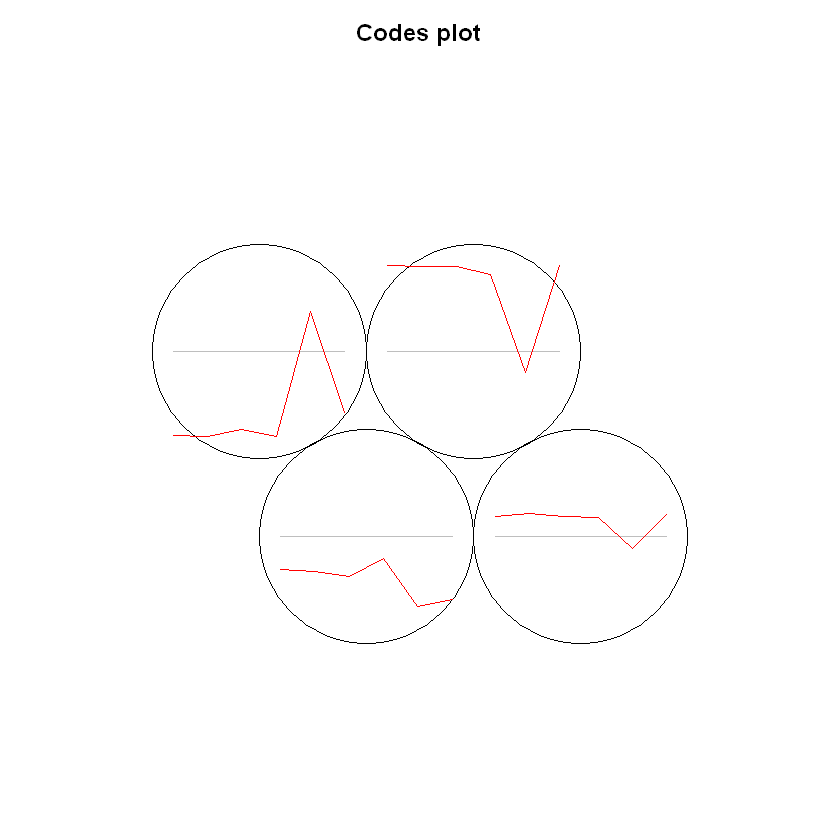

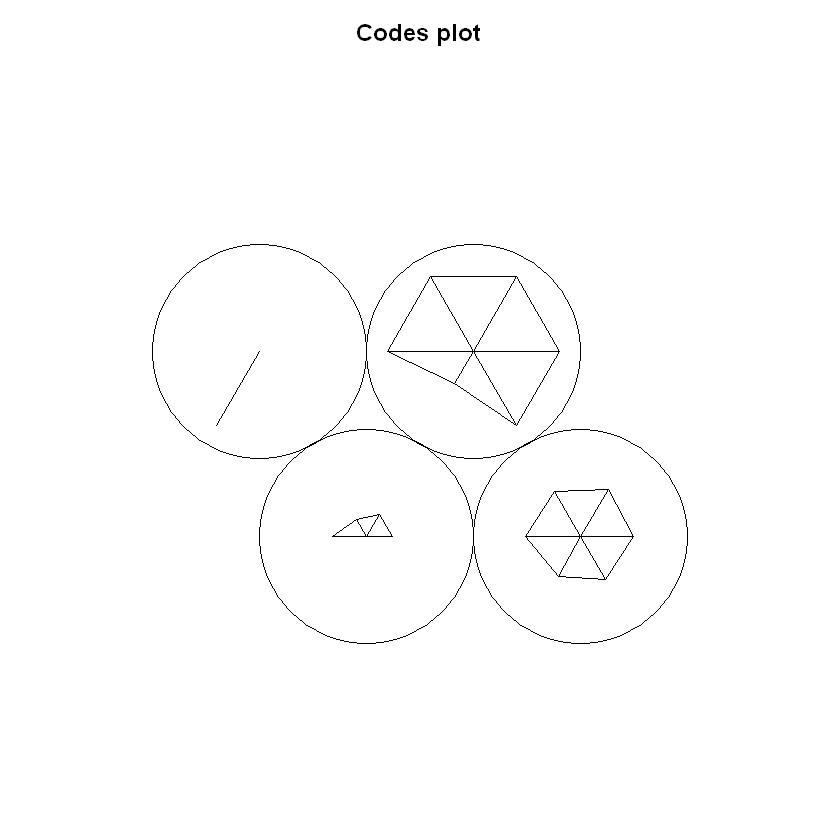

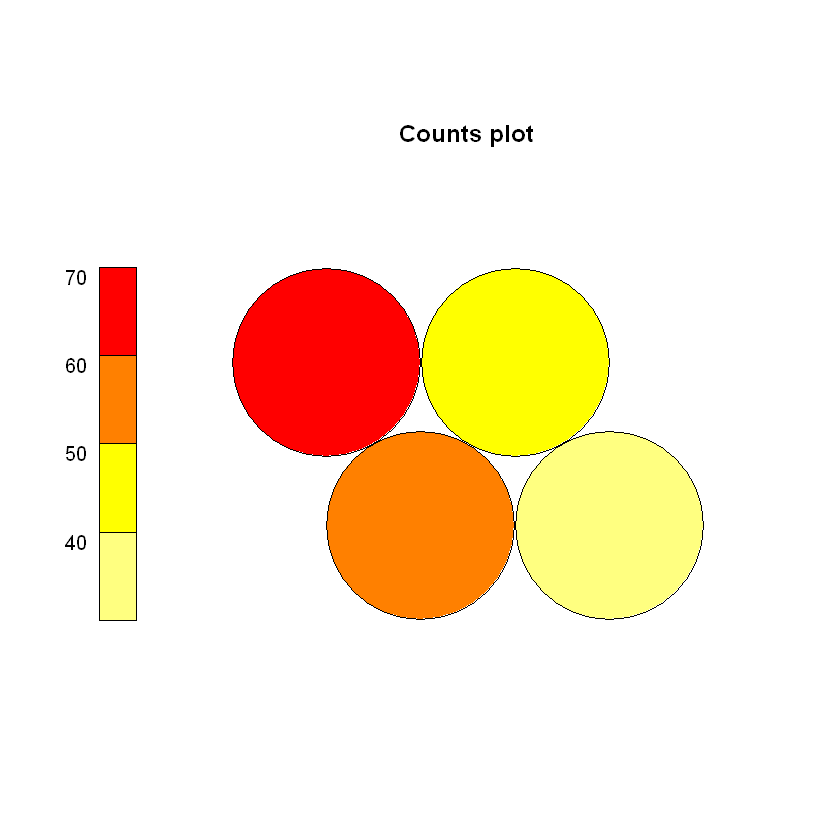

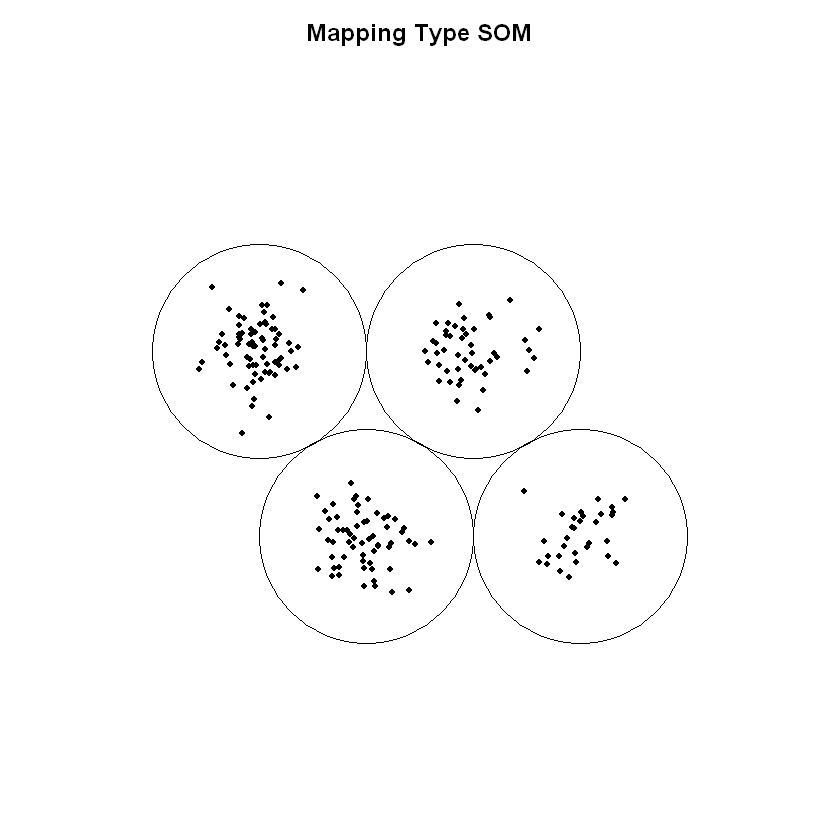

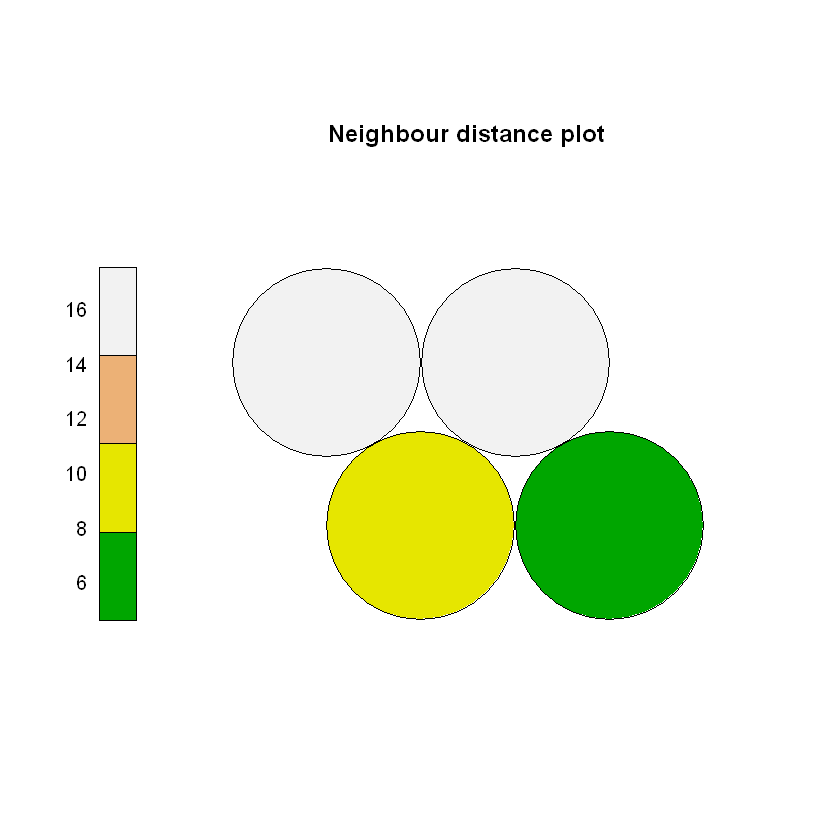

In [12]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


**Ejercicio 1:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

### R: 1.a

REFERENCIA: https://www.rdocumentation.org/packages/kohonen/versions/2.0.19/topics/som

som(data, grid=somgrid(), rlen = 100, alpha = c(0.05, 0.01), radius = quantile(nhbrdist, 0.67) * c(1, -1), init, toroidal = FALSE, n.hood, keep.data = TRUE)

### Valores de entrada:

        data: una matriz donde cada fila representa un objeto (semilla en este caso)
        grid: una grilla para los representativos. Existe la funcion somgrid para crear esta grilla
        rlen: el numero de veces en el que el set de datos completo se verá presentado a la red
        alpha: la razón de aprendimiento, se utiliza un vector que tiene dos datos. Por defecto es un decline linear desde 0.05 a 0.01 sobre las 'rlen' actualizaciones.
        radius: el radio de una vecindad, dado como un valor único o un vector (start,stop). Si es dado como un valor único el radio cubrirá desde este número hasta el valor negativo del número. Tan pronto como la vecindad sea menor a 1 la unidad vencedora será actualizadad. La configuración por defecto es empezar con un valor que cubra 2/3 de todas las distancias unidad-unidad. 
        init: Los representativos iniciales, representados como una matriz. Si se omiten, se eligen de manera aleatoria desde 'data'
        toroidal: si es TRUE, los bordes del map son unidos. Notar que en un mapa toroidal hexagonal, el número de filas debe ser par
        n.hood: La forma de la vecindad, puede ser "circular" o "cuadrada". La última es el valor por defecto para mapas rectangulares, la anterior para mapas hexagonales.
        keep.data: si o no guardar la data en un objeto de retorno

### Valores de retorno: 

        data : un objeto de la calse "kohonen" con componentes
        grid: una matriz de datos que se devuevle solo si keep.data == true
        codes: una matriz de la clase samgrid.
        changes: una matriz de vectores, que son la media de las distancias entr elos nodos vecinos.
        unit.classif: vector de las desviaciones promedios de el vector de codigos. 
        distances: Distancias de los objetos a su unidad ganadora correspondiente, solo se devuelven si keep.data == TRUE.
        toroidal: Se utiliza un mapa toroidal, explicado anteriormente.

### Gráficos

        Gráfico 1,2,3(codes plot ): Los pesos de las variables en cada nodo.

        segments: representación gráfica del mapa SOM en gráficos torta.

        lines: representación gráfica pero con lineas, util para resaltar patrones y tendencias en los datos.

        stars: a partir de la ubicación de las estrellas en el grafico, se pueden identificar agrupaciones.

        Gráfico 4 (counts plot): Es el número de observaciones por cada nodo (mientras más observaciones, más obscuros) -> Sirve para evaluar tendencias en los datos y entender sus distribuciones

        Gráfico 5 (mapping): Muestra como se han asignado las observaciones  a los diferentes nodos en el mapa SOM.

        Gráfico 6 (dist.neighbours) : la distancia entre los diferentes nodos del mapa. (ver que tan densos son)

Warning message in par(opar):
"argument 1 does not name a graphical parameter"


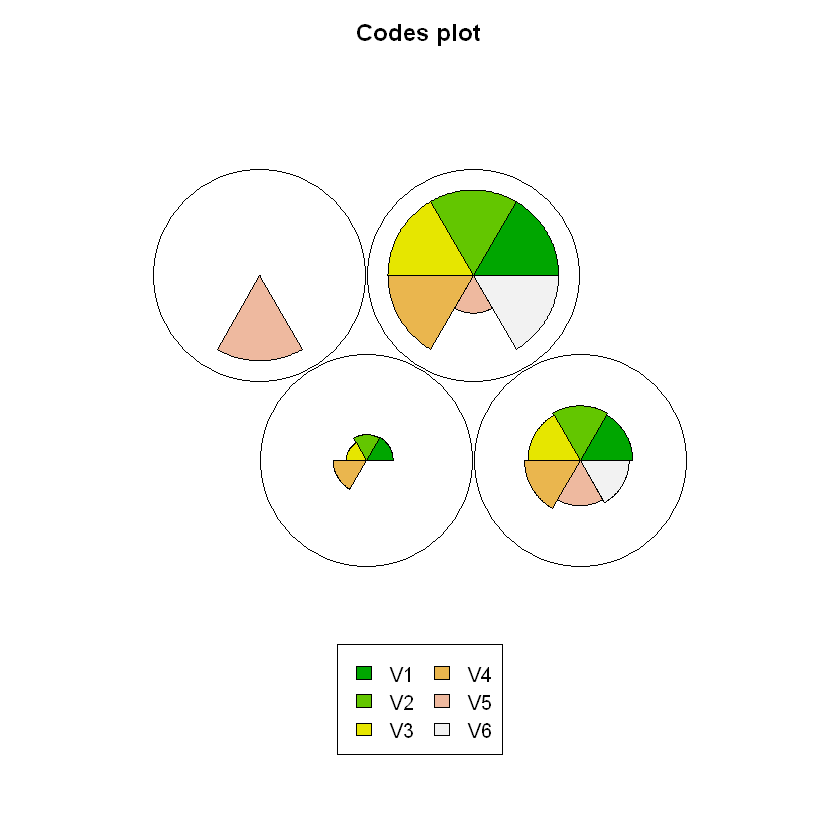

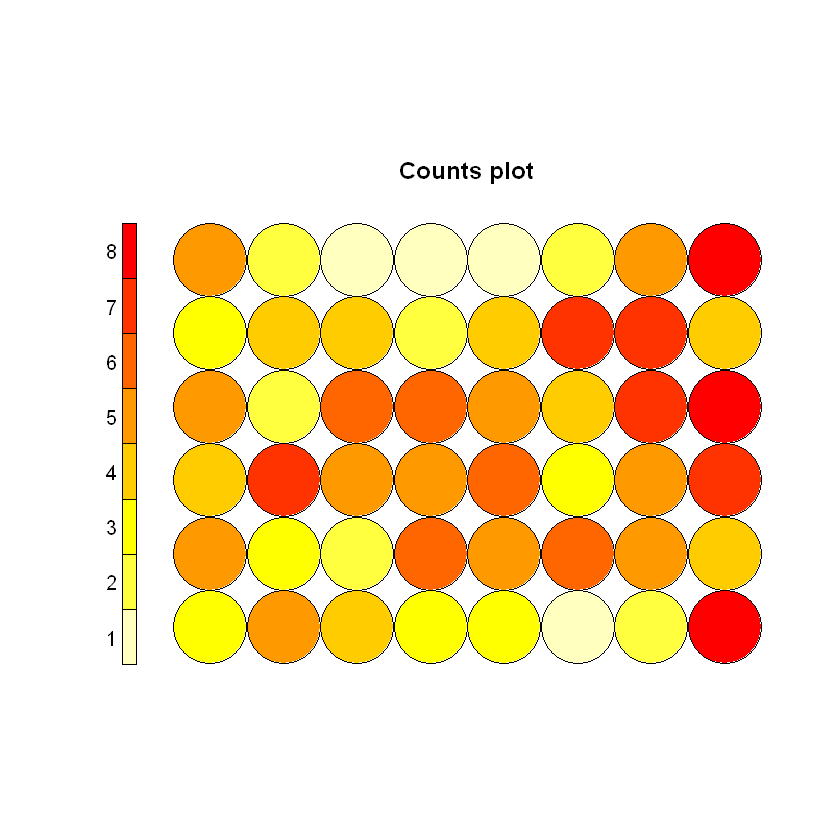

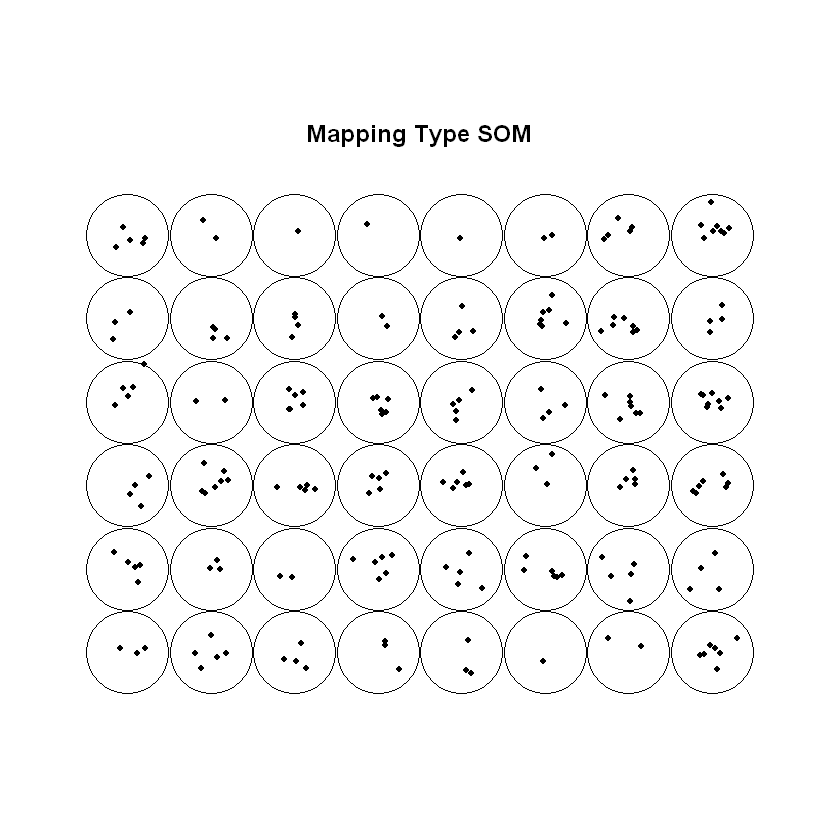

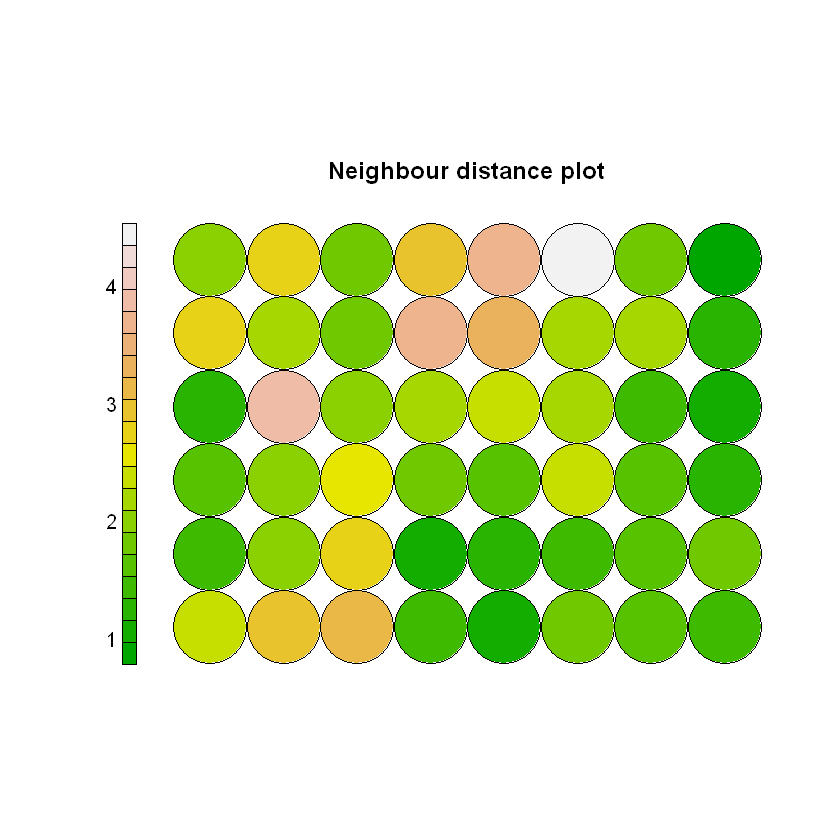

In [15]:
# 1.b)
somm <- som(scale(datos), rlen = 1000, alpha = 0.7, keep.data = TRUE)
#print(somm$codes)
plot(sommap,  codeRendering="segments")
#plot(sommap,  codeRendering="lines")
#plot(somm)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(somm, type = "counts", palette.name = colors, heatkey = TRUE)

plot(somm, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(somm, type = "dist.neighbours", palette.name = terrain.colors)


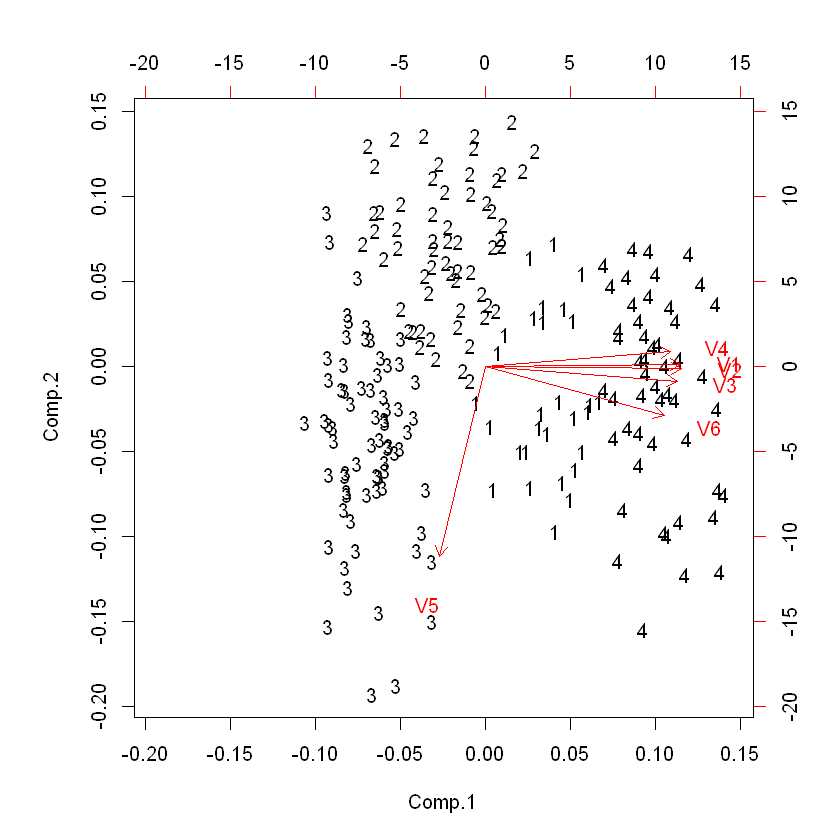

In [10]:
res <- princomp(datos, cor=TRUE)
cl <- sommap$unit.classif
biplot(res,xlabs=cl)

#### **Ejercicio 2:**

a) Explique como funciona esta nueva visualización. Interprete y comente los resultados obtenidos.

b) Complete el Ejercicio 4 de la tarea anterior con el agrupamiento que genera el método som con K=3. Compare los resultados de la medida de calidad con los otros tres métodos de clustering. Concluya.

#### **Ejercicio 3:**

Considere el subconjunto de datos del archivo datosComunas.csv que ha estudiado en las tareas anteriores.

a) Realice el análisis de agrupamiento con SOM y discuta sus resultados 

b) Proponga una estrategia gráfica para representarlos.